In [1]:
import sys
import socket

if socket.gethostname() == "qiaubuntu" or socket.gethostname() == "toologic-ubuntu2":
    sys.path.extend(['/home/jorg/repository/model_evaluation'])
else:
    sys.path.extend(['/home/jorg/repo/model_evaluation'])

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import cm

import numpy as np
import torch
import dill
import os
import glob

from networks.detection.general_setup import config_detector
from datasets.region_detection.create_detector_dataset import create_dataset
from utils.detection.batch_handler import BatchHandler
from plotting.color_maps import transparent_cmap

mycmap = transparent_cmap(plt.get_cmap('jet'))

# Constants aka fixed variables
ROOT_DIR = "/home/jorg/repository/model_evaluation"

# set seeds
SEED = 4325
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.enabled = True
np.random.seed(SEED)

%matplotlib inline
%load_ext autoreload
%autoreload 2
print("Ready")

Ready


In [11]:
fold = 2
dt_config_id = "fixed_46_31"
src_data_path = os.path.expanduser("~/expers/acdc/dcnn_mc_brier")
dataset = create_dataset(fold, src_data_path, mc_dropout=False, num_of_input_chnls="allchannels", limited_load=False,
                             dt_config_id=dt_config_id, cardiac_phases=tuple(('ES', 'ED')))

  0%|          | 0/100 [00:00<?, ?it/s]

INFO - Preparing ACDC data handler. This may take a while. Be patient...


100%|██████████| 100/100 [00:18<00:00,  5.36it/s]

#slices in train/test set 5784/456


In [40]:
val_batch = BatchHandler(data_set=dataset, is_train=False, verbose=False,
                                         keep_bounding_boxes=False, input_channels="allchannels",
                                         num_of_max_pool_layers=3,
                                         app_config=config_detector)

batch_size = dataset.get_size(is_train=False)
for val_image, val_labels in val_batch(batch_size=batch_size, keep_batch=False):
    if val_image.shape[3] == 0 or val_image.shape[2] == 0:
        print(val_batch.batch_patient_slice_id[-1])
        print(val_image.shape, val_labels[8].shape)


In [12]:
print(dataset.trans_dict["patient029"])
for idx in dataset.trans_dict["patient029"][1]:
    print(dataset.test_patient_slice_id[idx])

(False, [162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183])
('patient029', 1, 'ES', 12)
('patient029', 2, 'ES', 12)
('patient029', 3, 'ES', 12)
('patient029', 4, 'ES', 12)
('patient029', 5, 'ES', 12)
('patient029', 6, 'ES', 12)
('patient029', 7, 'ES', 12)
('patient029', 8, 'ES', 12)
('patient029', 9, 'ES', 12)
('patient029', 10, 'ES', 12)
('patient029', 11, 'ES', 12)
('patient029', 1, 'ED', 1)
('patient029', 2, 'ED', 1)
('patient029', 3, 'ED', 1)
('patient029', 4, 'ED', 1)
('patient029', 5, 'ED', 1)
('patient029', 6, 'ED', 1)
('patient029', 7, 'ED', 1)
('patient029', 8, 'ED', 1)
('patient029', 9, 'ED', 1)
('patient029', 10, 'ED', 1)
('patient029', 11, 'ED', 1)


(3, 256, 192)


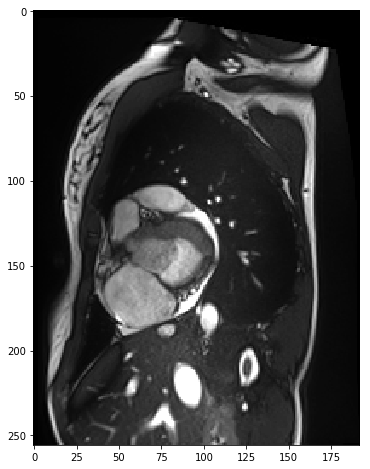

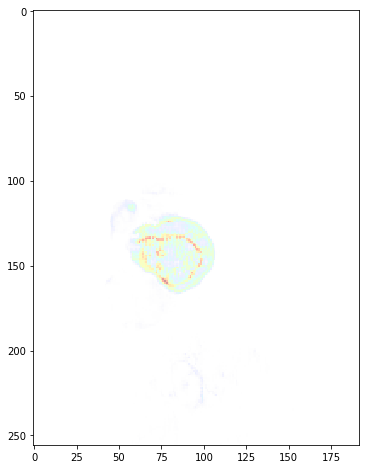

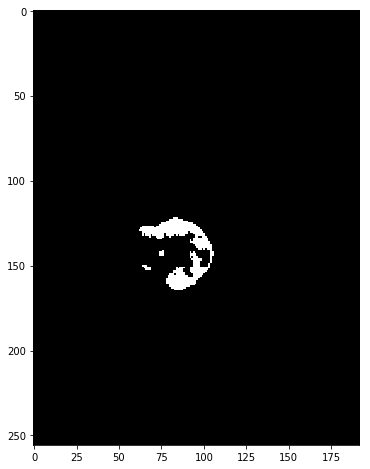

In [13]:
idx = 163
images = dataset.test_images[idx]
ref_labels = dataset.test_labels[idx]
print(images.shape)

plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(images[0], cmap=cm.gray)
plt.show()
plt.imshow(images[1], cmap=cm.jet)
plt.show()
plt.imshow(ref_labels, cmap=cm.gray)
plt.show()

In [38]:
batch_size = 128
train_batch = BatchHandler(dataset, is_train=True, cuda=True, keep_bounding_boxes=False, 
                                         verbose=False, app_config=config_detector)


In [39]:
x_input, y_lbl_dict = train_batch(batch_size=batch_size, do_balance=True, keep_batch=True)
ref_labels = train_batch.keep_batch_label_slices
print(len(ref_labels))
train_batch.fill_trans_dict()

128


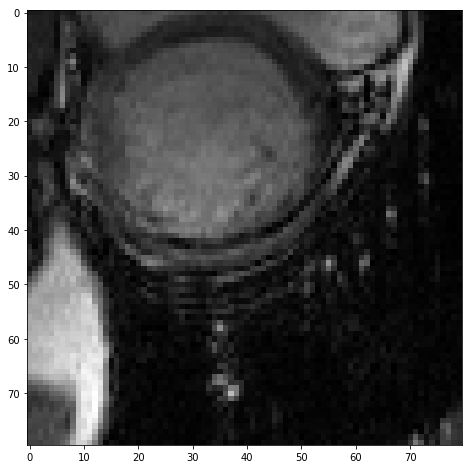

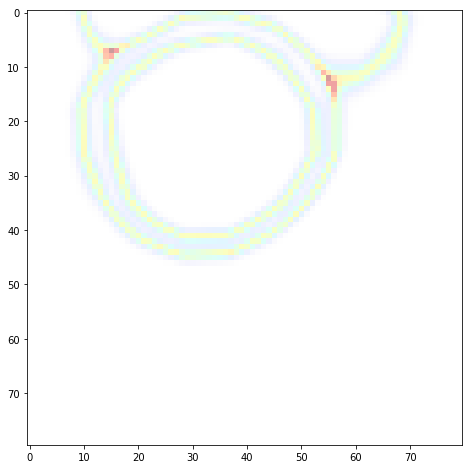

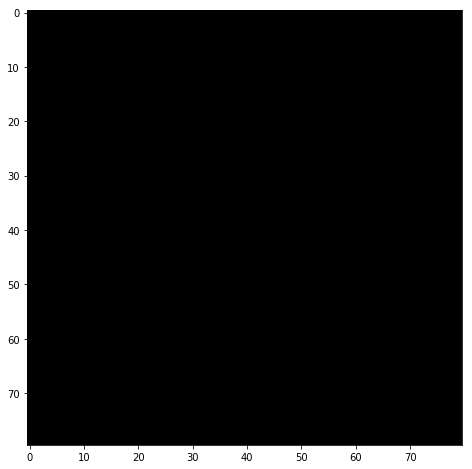

In [49]:
plt.rcParams['figure.figsize'] = [10, 8]
input_channels = x_input.detach().cpu().numpy()
idx = 61
plt.imshow(input_channels[idx, 0], cmap=cm.gray)
plt.show()
plt.imshow(input_channels[idx, 1], cmap=cm.jet)
plt.show()
plt.imshow(ref_labels[idx], cmap=cm.gray)
plt.show()

In [6]:
print(train_batch.batch_patient_slice_id)
print(train_batch.batch_dta_slice_ids)
# print(train_batch.trans_dict[21])
# print(dataset.trans_dict[train_batch.trans_dict[21]])

[('patient004', 10, 15), ('patient003', 5, 15), ('patient004', 5, 15), ('patient004', 9, 15), ('patient003', 7, 15), ('patient001', 3, 12), ('patient002', 5, 12), ('patient002', 10, 1), ('patient004', 2, 1), ('patient002', 6, 12), ('patient002', 2, 12), ('patient003', 9, 1), ('patient001', 10, 12), ('patient002', 8, 12), ('patient001', 10, 12), ('patient004', 10, 15)]
[276, 185, 156, 38, 38, 278, 178, 256, 275, 11, 99, 284, 103, 87, 234, 110]


(True, [240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319])


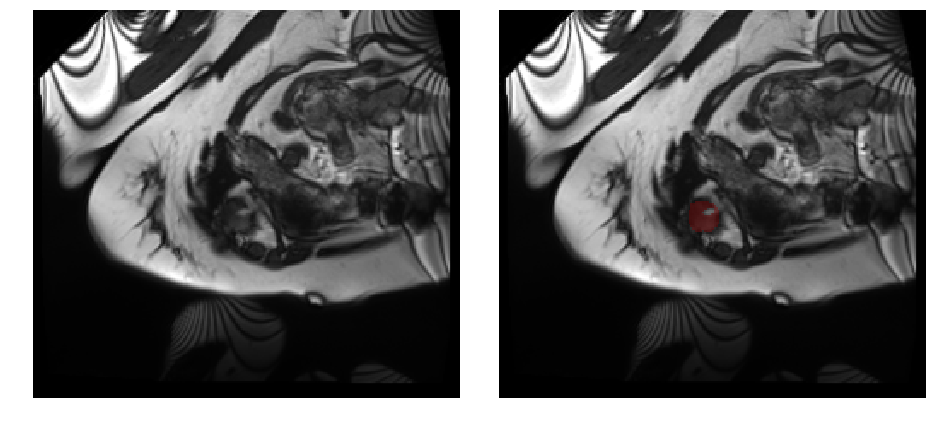

In [7]:
print(dataset.trans_dict["patient004"])
dataset_slice_id = 117
input_channels = dataset.train_images[dataset_slice_id]
target_labels = dataset.train_labels[dataset_slice_id]

fig = plt.figure(figsize=(16, 16))
ax1 = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
ax1.imshow(input_channels[0], cmap=cm.gray)
plt.axis("off")
ax2 = plt.subplot2grid((2, 4), (0, 2), rowspan=2, colspan=2)
ax2.imshow(input_channels[0], cmap=cm.gray)
ax2.imshow(target_labels, cmap=mycmap)
plt.axis("off")
plt.show()


number_of_slices 7 height, width 56, 16


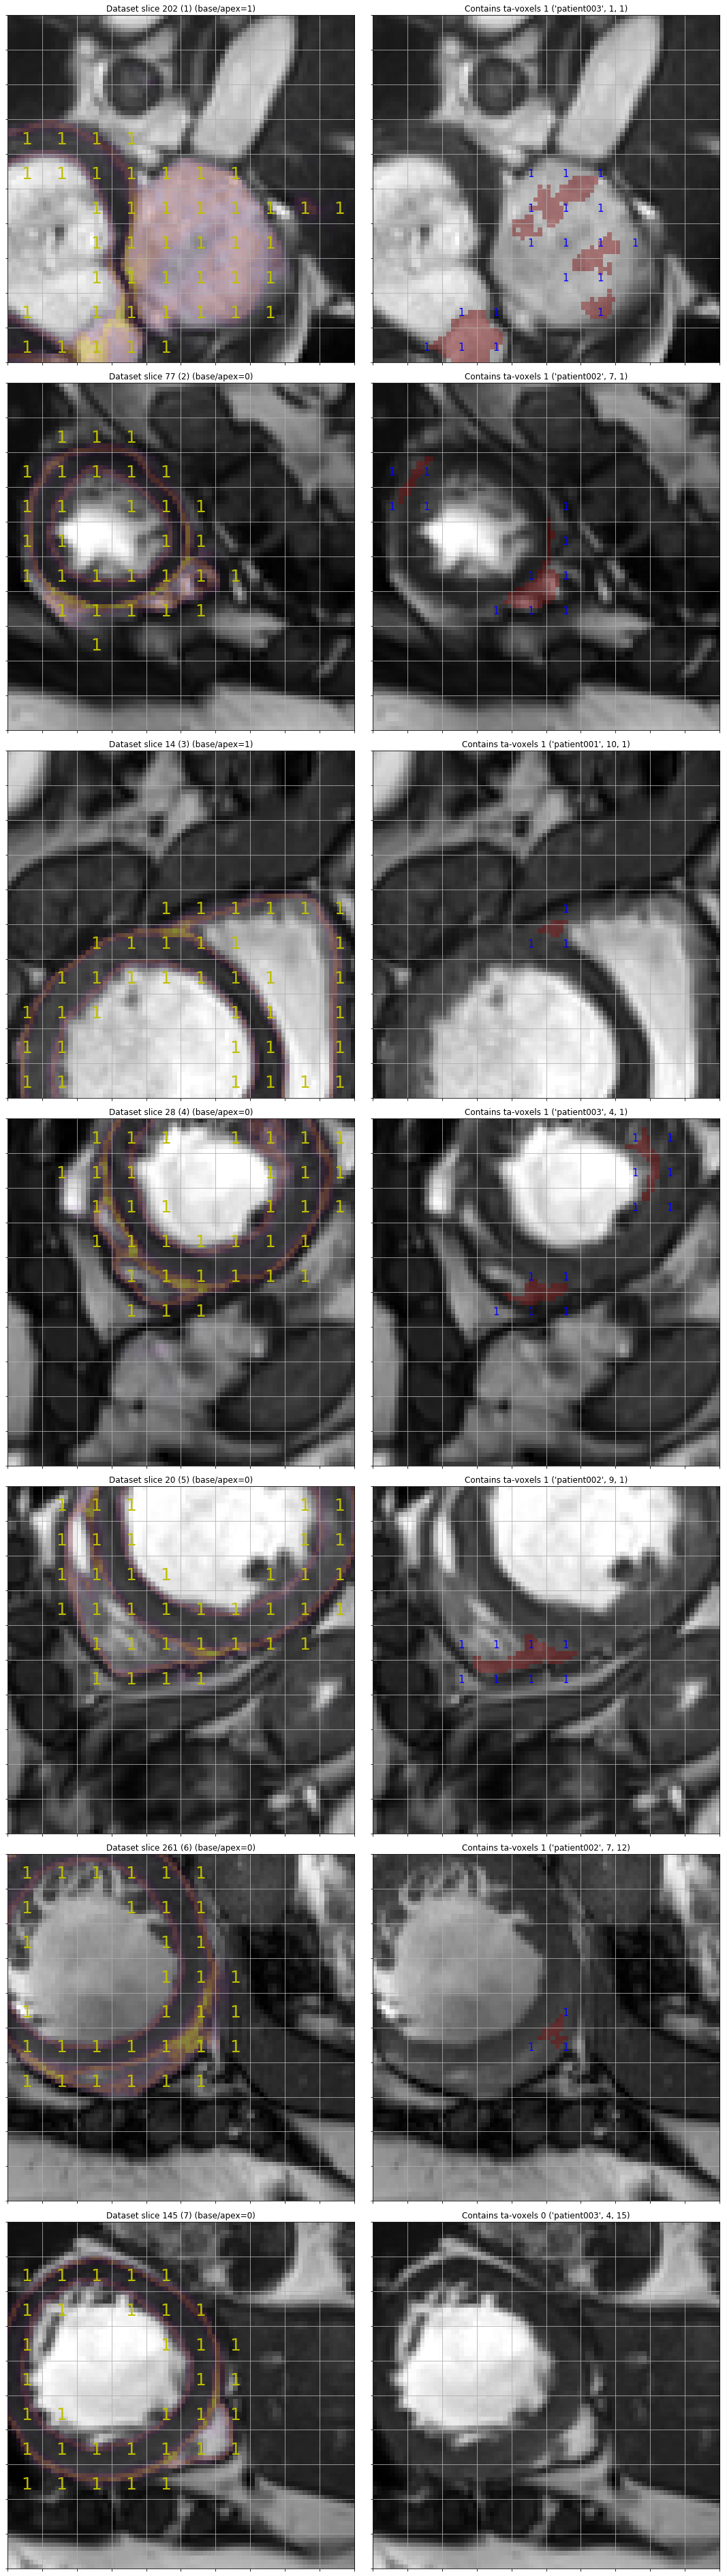

In [32]:
train_batch.visualize_batch(grid_spacing=8, index_range=[0, 7], base_apex_only=False, sr_threshold=0.5,
                               data_handler=data_handler, patient_id=None,
                               left_column="map", right_column="error_roi",
                                heat_map_handler=None, alpha=0.4)

In [ ]:
slice_num = 5185
print(dataset.train_patient_slice_id[slice_num])

input_channels = dataset.train_images[slice_num]
labels = dataset.train_labels[slice_num]
roi = dataset.train_lbl_rois[slice_num][0]
print(labels.shape)
print(roi)
roi_bbox = BoundingBox.create(roi)
print(roi_bbox.width, roi_bbox.height)
print(roi_bbox.area)
# slice(120, 200, None), slice(167, 247, None)
patch_labels = labels[120:200, 167:247]

fig = plt.figure(figsize=(16, 16))

ax1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
ax1.imshow(labels)
roi_patch = roi_bbox.get_matplotlib_patch()
ax1.add_patch(roi_patch)

ax2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
ax2.imshow(patch_labels)

plt.show()

In [ ]:
zeros = 0
negatives = 0
for slice_num, train_lbl_rois in enumerate(dataset.train_lbl_rois):
    if train_lbl_rois.shape[0] != 0:
        # print(train_lbl_rois)
        roi = train_lbl_rois[0]
        if np.any(roi < 0):
            negatives += 1
            print(slice_num)
        elif np.any(roi == 0):
            zeros += 1
        else:
            roi_box = BoundingBox.create(roi)
            if roi_box.area > 10000:
                print(slice_num)
print(zeros, negatives)